<a href="https://colab.research.google.com/github/vir097/Bike-Sharing-Demand-Prediction---viral-shewale/blob/main/Bike_Sharing_Demand_Prediction_Viral_shewale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## **Import libraries and load dataset**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load dataset
df = pd.read_csv("/content/drive/MyDrive/Bike Sharing Demand Prediction --viral shewale/SeoulBikeData.csv", encoding ='unicode_escape')

## **Basic Inspection of Dataset**

In [4]:
df.shape

(8760, 14)

* **There are $8760$ rows and $14$ columns (Attribute) in the dataset.**

In [5]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# get the different columns 
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

*  **What humidity means in weather?**
  
  Humidity is the amount of water vapor in   the air

* **What is the Dew point temperature?**
    
    The atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form.
   
* **Formula:-** Td = T - ((100 - RH)/5)
     
  *where*,
     * Td is dew point temperature (in degrees Celsius)
     * T is observed temperature (in degrees Celsius)
     * RH is relative humidity (in percent).    

In [7]:
# checking for data type 
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [8]:
# checking for null values present in the dataset
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* **There are no null value present in the dataset.**

In [9]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**Cleaning Dataset**

* **Convert the 'Date' column to datetime format**

In [10]:
# convert the 'Date' column to datetime format
df['Date']= pd.to_datetime(df['Date'])

In [11]:
# Check the format of 'Date' column
df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object

* **Changing column name**

In [12]:
df.rename(columns= {'Rented Bike Count': 'rented_bike_count','Temperature(°C)':'temperature', 
                    'Humidity(%)':'humidity','Wind speed (m/s)': 'wind_speed', 
                    'Visibility (10m)': 'visibility','Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall','Functioning Day':'functioning_day'},
          inplace=True)

**Checking for Collinearity**

* Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. 
* Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [13]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [14]:
calc_vif(df[[i for i in df.describe().columns if i not in ['rented_bike_count']]])

,variables,VIF
0,Hour,4.418242
1,temperature,33.385256
2,humidity,5.371996
3,wind_speed,4.805364
4,visibility,9.085977
5,dew_point_temp,17.126199
6,solar_radiation,2.881590
7,rainfall,1.081567
8,snowfall,1.120833


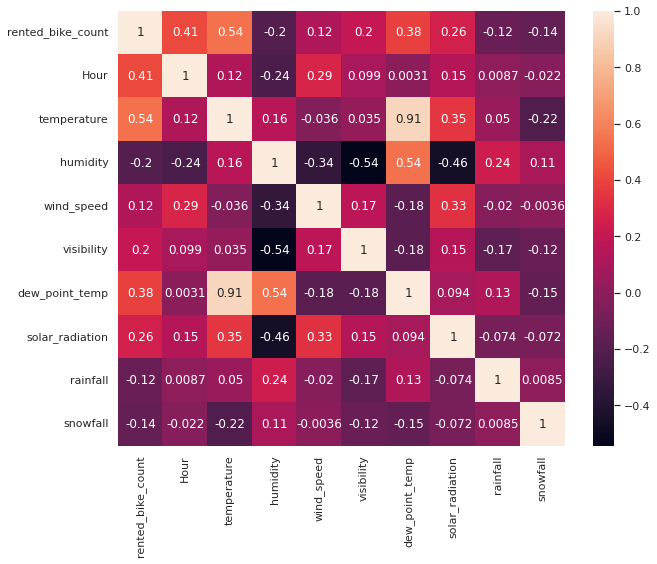

In [15]:
# Correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

* We can see that **dew point temperature** and **temperature** are highly correlated($0.91$). Hence we can drop the column from the dataset since it will not increase the prediction accuracy and will only increase the model complexity.

In [16]:
df.drop('dew_point_temp',axis=1, inplace=True)

**Extracting new columns 'month' and 'day_of_week' from the 'Date' column:**

In [17]:
import datetime

df['month'] = df['Date'].dt.month
df['day_of_week'] = df['Date'].dt.dayofweek

# {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

## **Exploratory Data Analysis:**

### **Analysing Dependent variable:-**

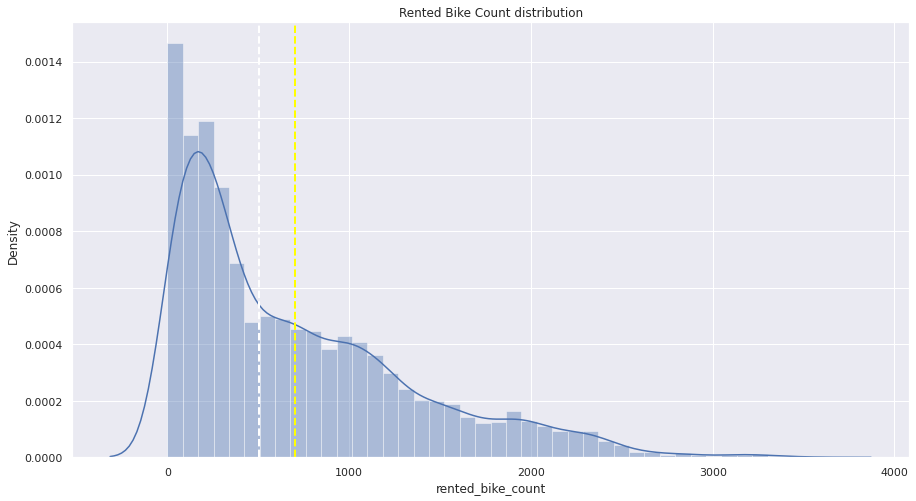

In [18]:
# Analysing distribution of rented bike count
plt.figure(figsize=(15,8))
sns.distplot(df['rented_bike_count'])
plt.xlabel('rented_bike_count')
plt.title('Rented Bike Count distribution')
plt.axvline(df['rented_bike_count'].mean(), color='yellow', linestyle='dashed', linewidth=2)
plt.axvline(df['rented_bike_count'].median(), color='white', linestyle='dashed', linewidth=2)

* Rented Bike Count (dependent variable) is positively skewed variable.

### **Analysing independent variable:-**

#### **Continuous Variable:-**

In [19]:
continuous_features = ['temperature','humidity','visibility','wind_speed','solar_radiation','snowfall','rainfall']

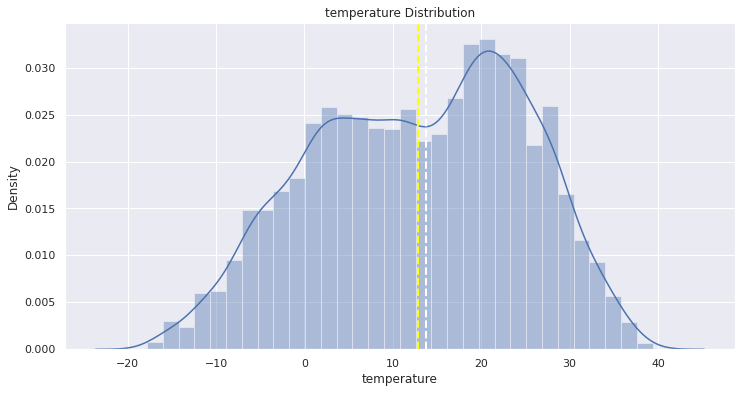

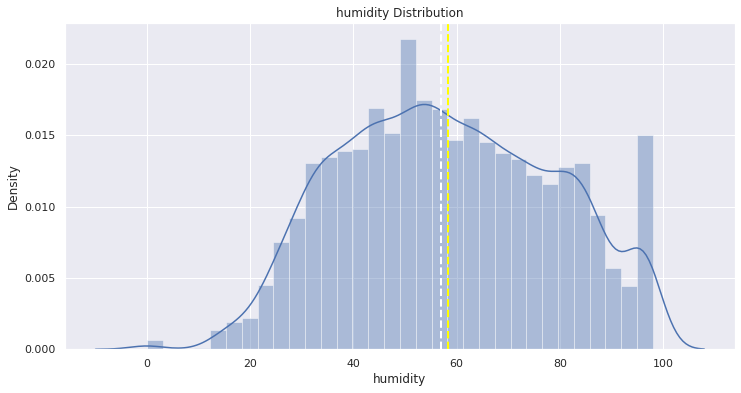

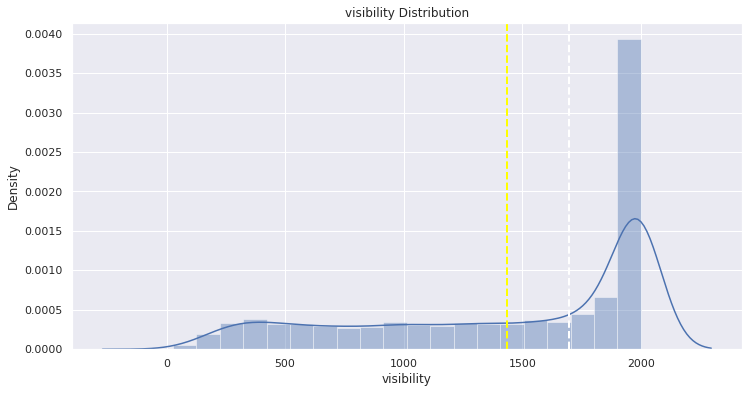

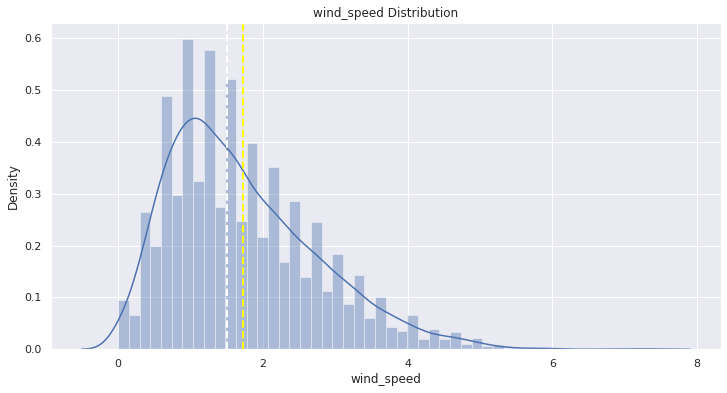

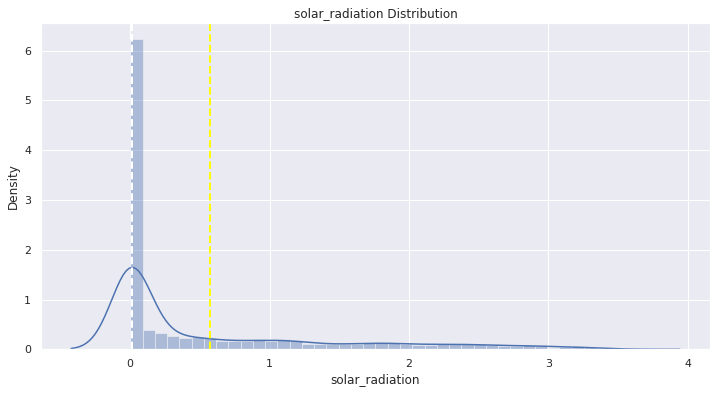

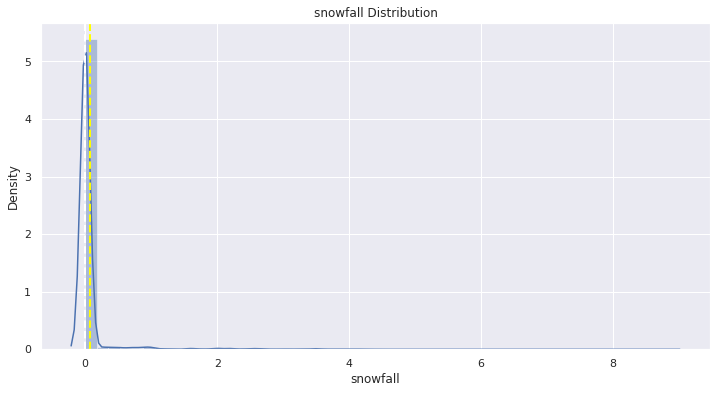

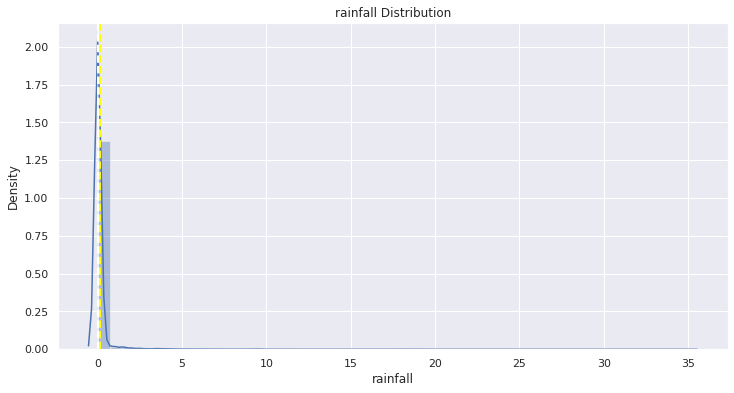

In [20]:
for var in continuous_features:
  plt.figure(figsize=(12,6))
  sns.distplot(df[var])
  plt.xlabel(var)
  plt.title( var +' Distribution')
  plt.axvline(df[var].mean(), color='yellow', linestyle='dashed', linewidth=2)
  plt.axvline(df[var].median(), color='white', linestyle='dashed', linewidth=2)

* Temperatue and Humidity are **normally distributed.**

* solar radiation, rainfall, snowfall and wind speed are **Positively skewed**.

* visibility is **Negtively skewed**.


**$Continuous$ $variable$ VS $Dependent$ $variable$**

Text(0.5, 1.0, 'temperature vs rented_bike_count')

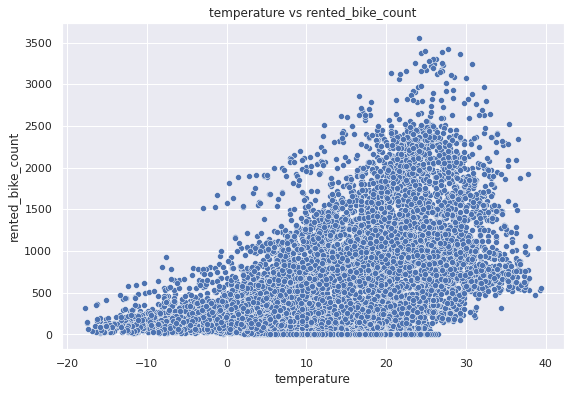

In [21]:
# Relation between temperature and rented_bike_count
plt.figure(figsize=(9,6))
sns.scatterplot(x=df['temperature'],y=df['rented_bike_count'])
plt.title('temperature vs rented_bike_count')

* $Temperature$ variable is **positively correlated** with dependent variable.(A positive correlation is a relationship between two variables such that their values increase or decrease together.)

Text(0.5, 1.0, 'solar_radiation vs rented_bike_count')

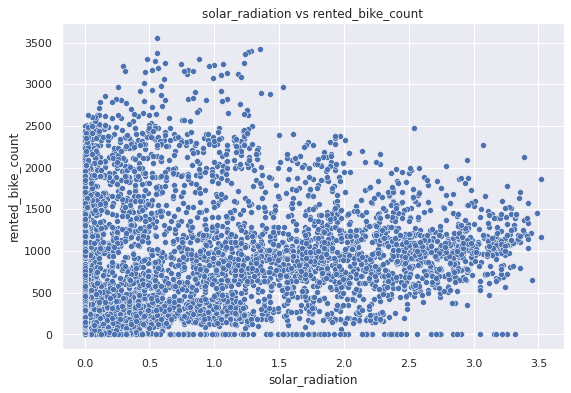

In [22]:
# Relation between solar radiation and rented_bike_count
plt.figure(figsize=(9,6))
sns.scatterplot(x=df['solar_radiation'],y=df['rented_bike_count'])
plt.title('solar_radiation vs rented_bike_count')

* $solar$ $radiation$ variable is **Positively correlated** with dependent variable.

Text(0.5, 1.0, 'visibility vs rented_bike_count')

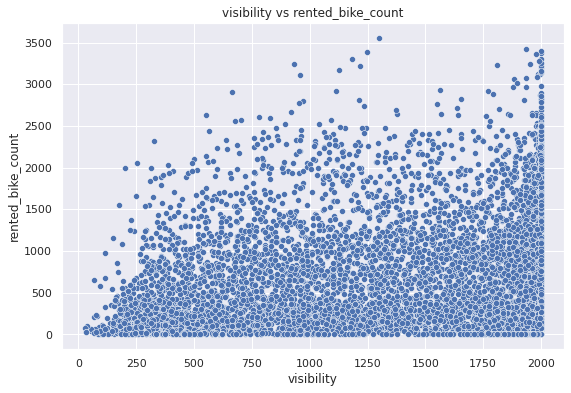

In [23]:
# Relation between visibility and rented_bike_count
plt.figure(figsize=(9,6))
sns.scatterplot(x=df['visibility'],y=df['rented_bike_count'])
plt.title('visibility vs rented_bike_count')

* $visibility$ variable is **positively correlated** with dependent variable.

Text(0.5, 1.0, 'humidity vs rented_bike_count')

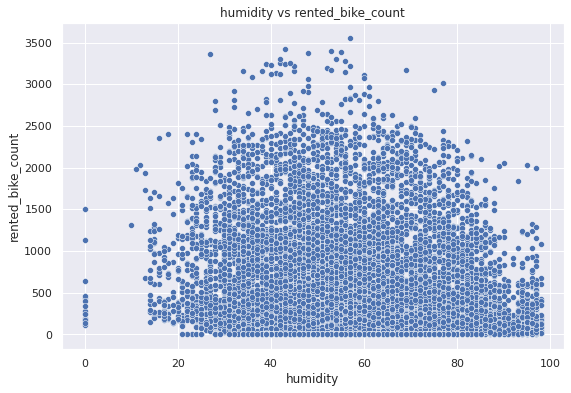

In [24]:
# Relation between humidity and rented_bike_count
plt.figure(figsize=(9,6))
sns.scatterplot(x=df['humidity'],y=df['rented_bike_count'])
plt.title('humidity vs rented_bike_count')

Text(0.5, 1.0, 'rainfall vs rented_bike_count')

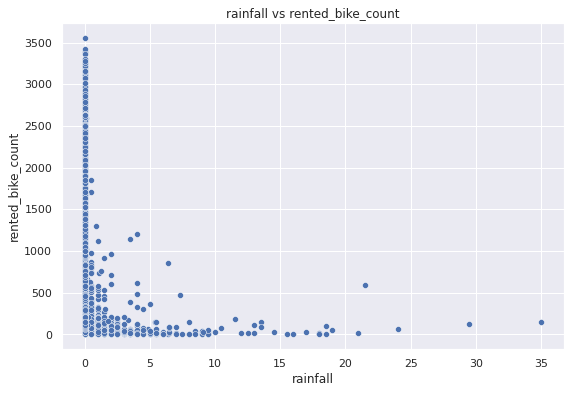

In [25]:
# Relation between rainfall and rented_bike_count
plt.figure(figsize=(9,6))
sns.scatterplot(x=df['rainfall'],y=df['rented_bike_count'])
plt.title('rainfall vs rented_bike_count')

Text(0.5, 1.0, 'snowfall vs rented_bike_count')

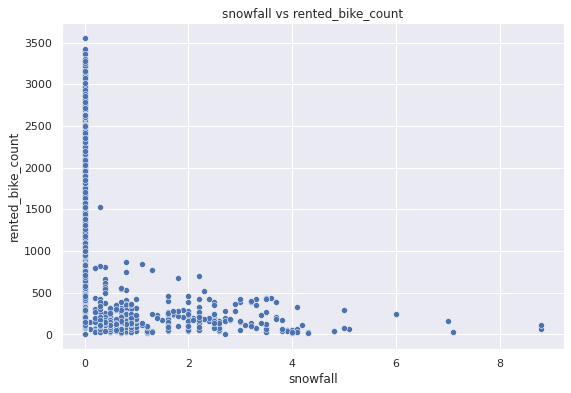

In [26]:
# Relation between snowfall and rented_bike_count
plt.figure(figsize=(9,6))
sns.scatterplot(x=df['snowfall'],y=df['rented_bike_count'])
plt.title('snowfall vs rented_bike_count')

* $Snowfall$, $Rainfall$ and $humidity$ are negatively correlated with **Rented bike count**.
    (A **negative correlation** is a relationship between two variables such that as the value of one variable increases, the other decreases.)

#### **Categorical Variable:-**

In [27]:
categorical_features = ['Seasons','Holiday','functioning_day','Hour','month','day_of_week']

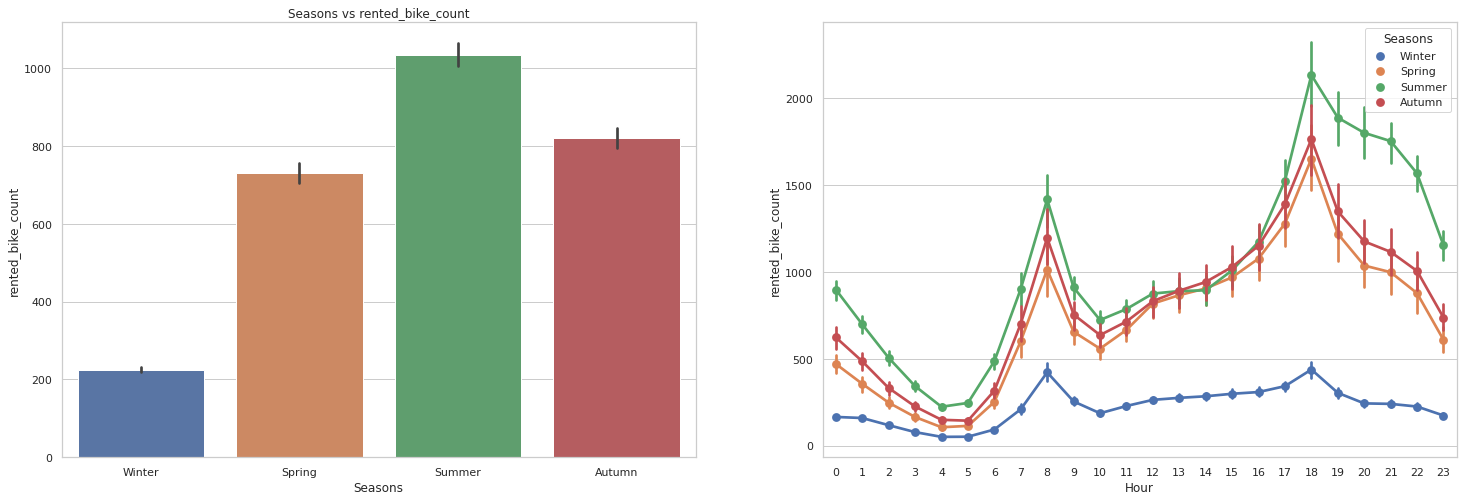

In [28]:
# visualising relation between seasons and rented bike count
sns.set_style("whitegrid")
plt.figure(figsize=(25,8))
plt.subplot(1, 2, 1)
sns.barplot(x='Seasons',y='rented_bike_count',data=df)
plt.title('Seasons vs rented_bike_count')

plt.subplot(1, 2, 2)
sns.pointplot(data = df, x = 'Hour', y = 'rented_bike_count', hue = 'Seasons')

* The demand for rented bikes was highest in the **Summer** season and lowest in the **Winter** season.

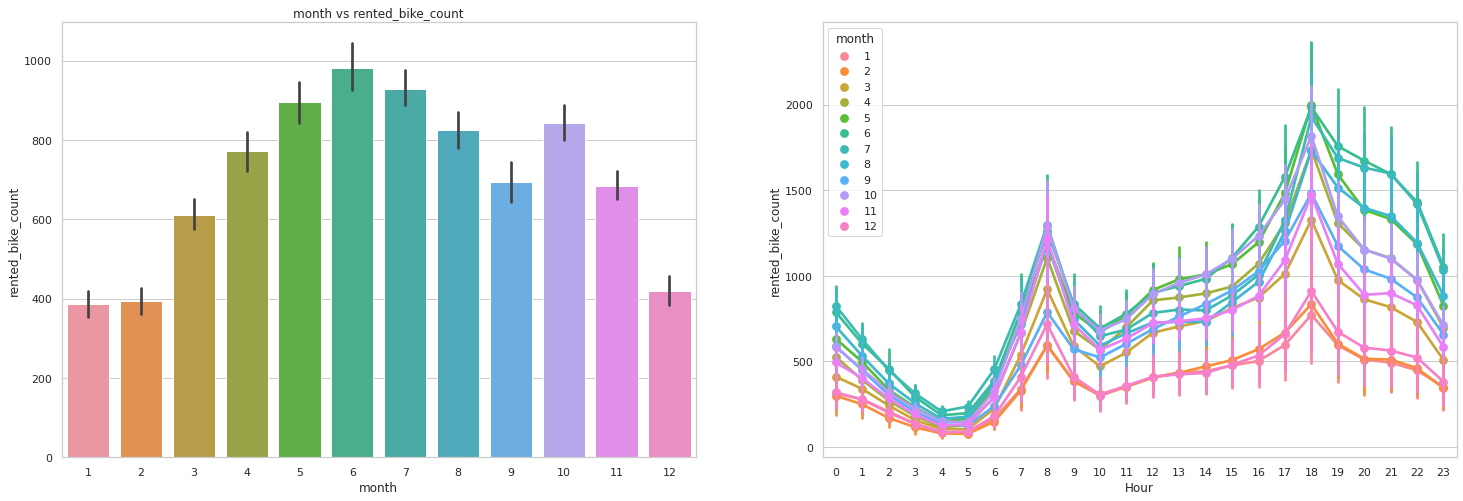

In [29]:
# visualising relation between month and rented bike count
sns.set_style("whitegrid")
plt.figure(figsize=(25,8))
plt.subplot(1, 2, 1)
sns.barplot(x='month',y='rented_bike_count',data=df)
plt.title('month vs rented_bike_count')


plt.subplot(1, 2, 2)
sns.pointplot(data = df, x = 'Hour', y = 'rented_bike_count', hue = 'month')

* As we have seen, the rented bike count is highest in the summer season (summer began in Jun and ends in September)

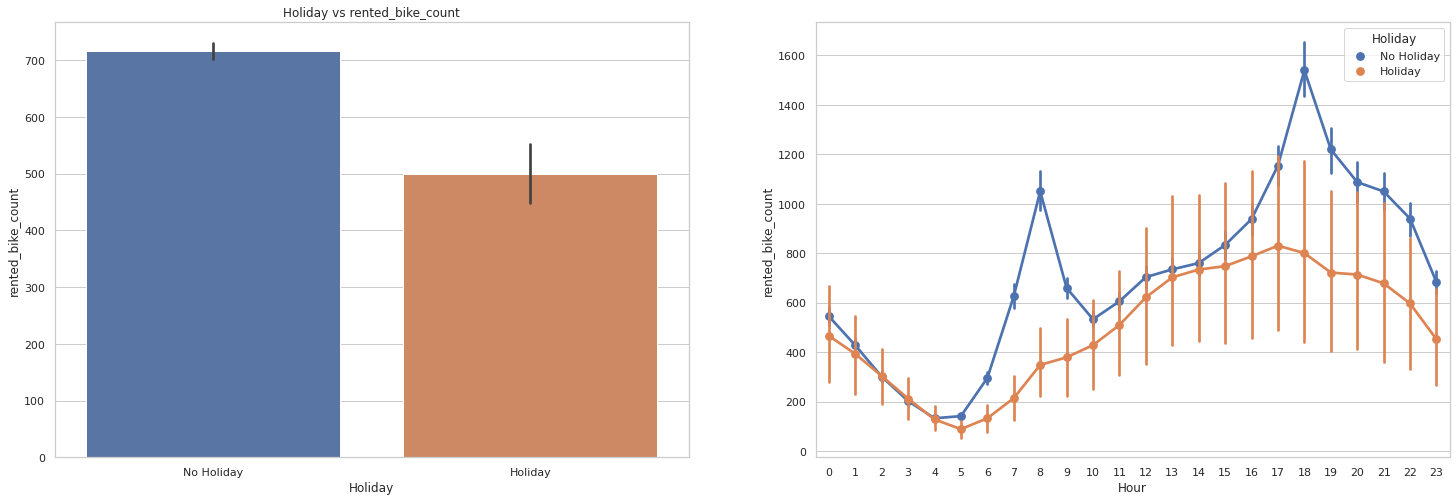

In [30]:
# visualising relation between Holiday and rented bike count
sns.set_style("whitegrid")
plt.figure(figsize=(25,8))
plt.subplot(1, 2, 1)
sns.barplot(x='Holiday',y='rented_bike_count',data=df)
plt.title('Holiday vs rented_bike_count')


plt.subplot(1, 2, 2)
sns.pointplot(data = df, x = 'Hour', y = 'rented_bike_count', hue = 'Holiday')

* The demand for rented bikes was higher on working days than non-working days(Holiday).

In [31]:
df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

Text(0.5, 1.0, 'functioning_day vs rented_bike_count')

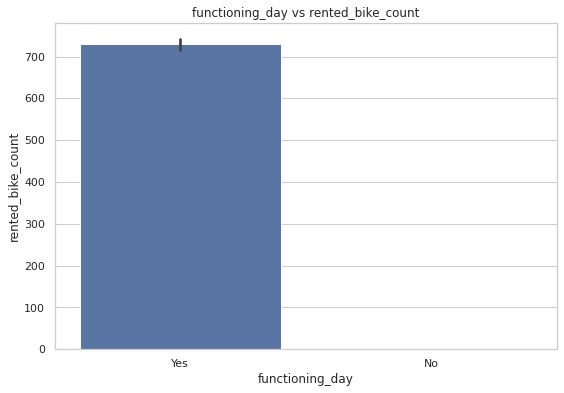

In [32]:
# visualising relation between functioning_day and rented bike count
plt.figure(figsize=(9,6))
sns.barplot(x='functioning_day',y='rented_bike_count',data=df)
plt.title('functioning_day vs rented_bike_count')

* On a non functioning day, no bikes were rented.

Text(0.5, 1.0, 'Hour vs rented_bike_count')

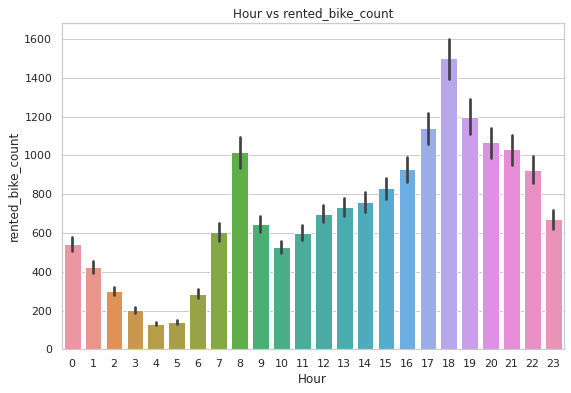

In [33]:
# visualising relation between hours and rented bike count
plt.figure(figsize=(9,6))
sns.barplot(x='Hour',y='rented_bike_count',data=df)
plt.title('Hour vs rented_bike_count')

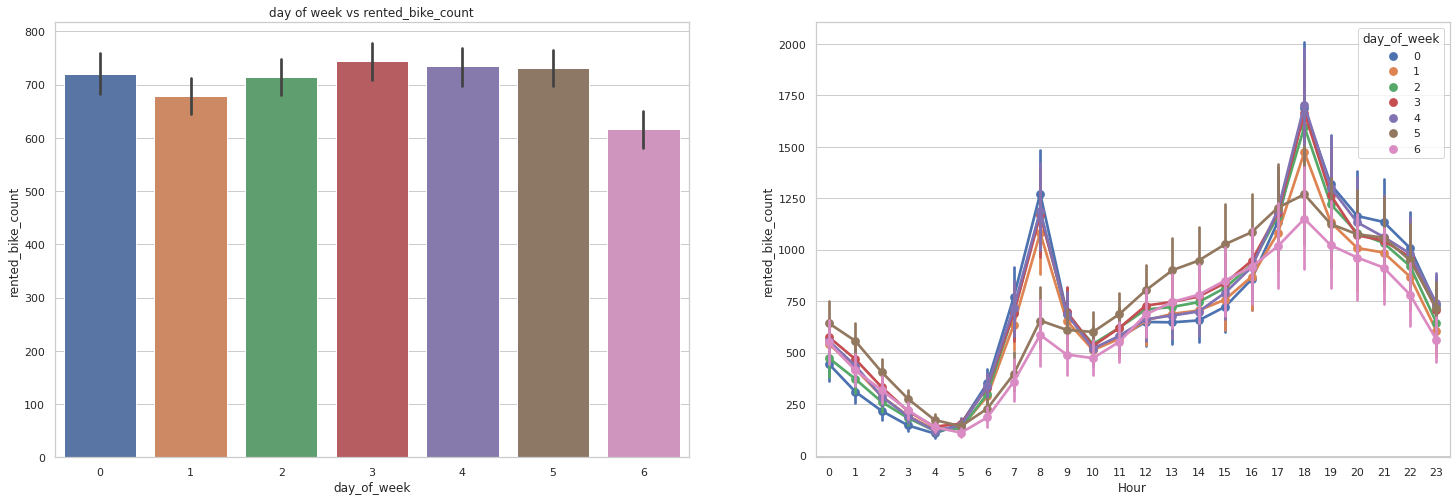

In [34]:
# visualising relation between day of week and rented bike count
sns.set_style("whitegrid")
plt.figure(figsize=(25,8))
plt.subplot(1, 2, 1)
sns.barplot(x='day_of_week',y='rented_bike_count',data=df)
plt.title('day of week vs rented_bike_count')

plt.subplot(1, 2, 2)
sns.pointplot(data = df, x = 'Hour', y = 'rented_bike_count', hue = 'day_of_week')

{0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

* As we can see, the rented bike demand on average was constant from Monday to Saturday. Demand was lower on Sunday (weekend).

### **Chicking outlires**

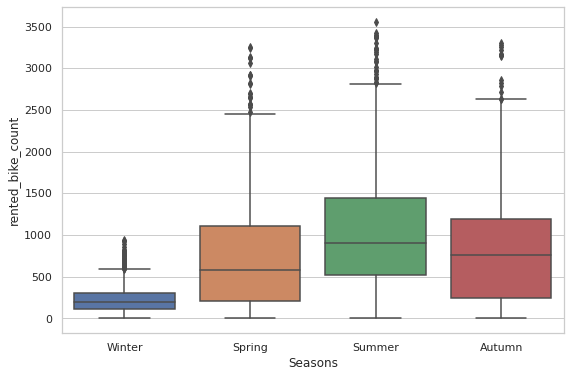

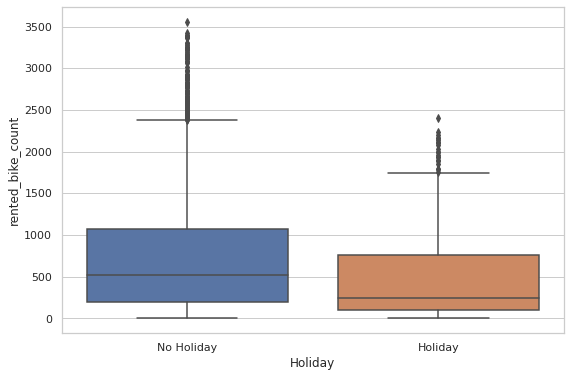

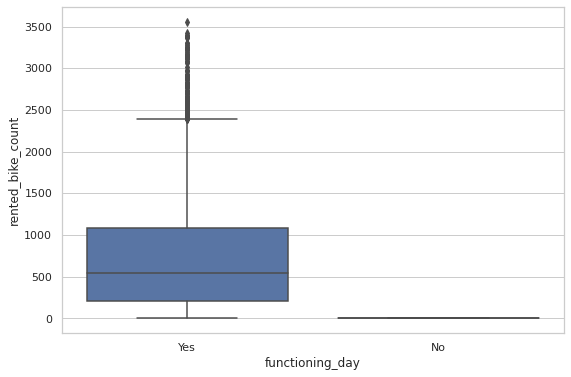

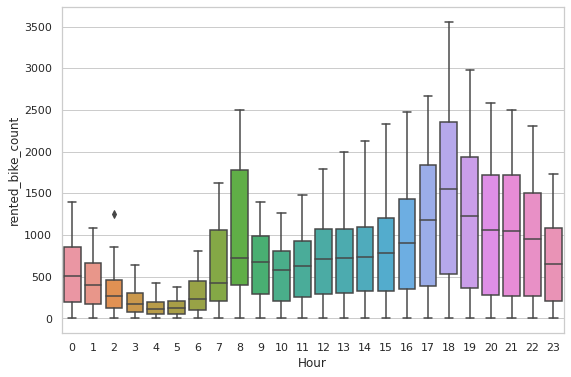

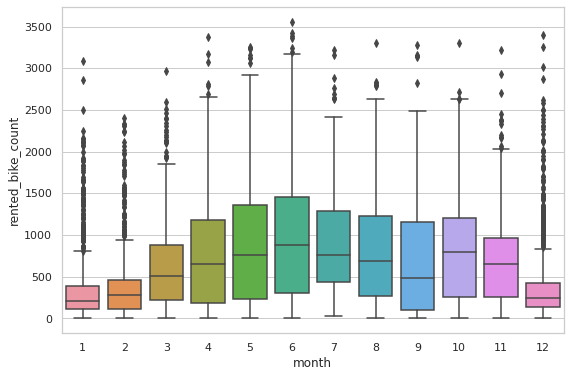

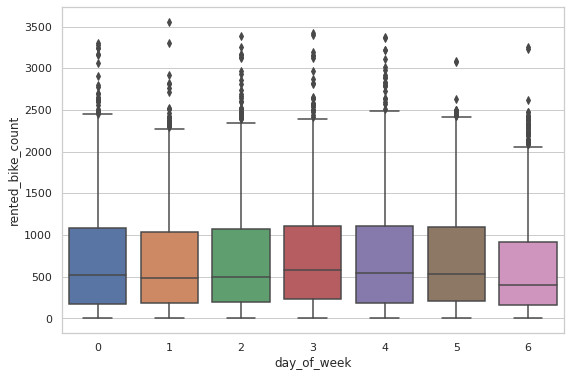

In [35]:
for var in categorical_features:
  plt.figure(figsize=(9,6))
  sns.boxplot(x=df[var], y=df['rented_bike_count'])

* As we can see, there are some outliers present in the dataset. We have to consider them at the time of model building.  We didnt drop them because if we do so, we may loose out important trends/patterns in the data.

## **Encoding:-**

In [36]:
df.head()

,Date,rented_bike_count,Hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,Seasons,Holiday,functioning_day,month,day_of_week
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,3
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,3
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,3


In [37]:
df['fun_day'] = df['functioning_day'].apply(lambda x: 1 if x=='Yes' else 0)

In [38]:
df['holiday'] = df['Holiday'].apply(lambda x: 0 if x=='No Holiday' else 0)

In [39]:
# one hot encoding
df = pd.get_dummies(df, columns=["Seasons"],prefix='Season',prefix_sep='_')

In [40]:
# Drop Holiday, functioning_day  and Date columns
# we are droping date column because date column is not used to buid ML model

df.drop(['Holiday','functioning_day','Date'], axis=1, inplace=True)

In [41]:
df.head()

,rented_bike_count,Hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,month,day_of_week,fun_day,holiday,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,3,1,0,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,3,1,0,0,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,3,1,0,0,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,3,1,0,0,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,3,1,0,0,0,0,1


In [42]:
df.shape

(8760, 17)

## **Modeling:-**

**Model selection approach:-**

* We are working on a dataset which contains outliers. Hence we have to choose a model which is less sensitive to outliers.

   **List of Machine Learning algorithms which are less sensitive to outliers:**
 1. Decision Tree
 2. Random Forest
 3. XGBoost

* A dataset with many categorical independent variables which are not linearly related to a dependent variable. Hence it is not advisable to use linear models to make predictions. We can use tree models instead.

* Choose the model with the highest accuracy for deployment.

**Evaluation of build Model**

* Model evaluation is very important in data science. It helps to understand the performance of model and makes it easy to present model.

*  We know that the data we are working with contains outliers, we didnt drop them because if we do so, we may loose out important trends/patterns in the data.

* The **MAE** is a good measure for evaluating the performance of a model because MAE is proportional to the observed mean and **MAE is robust to outliers**.

* **Adjusted R Square** will penalize additional independent variables added to the model and adjust the metric to **prevent overfitting issues**.

###  **1. Decision Tree**

In [43]:
# import libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [44]:
# Defining x and y
X = df.drop('rented_bike_count', axis=1)
Y = df['rented_bike_count']

In [45]:
# spiting data into traing and test set
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [46]:
print(X_train.shape)
print(X_test.shape)

(7008, 16)
(1752, 16)


In [47]:
# Using gridsearchcv to find the hyperparameters with best predictions
dt_model = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(18,24),
             'min_samples_leaf':np.arange(30,40,2)}

In [48]:
dt_gridsearch = GridSearchCV(dt_model,
                             dt_params,
                             cv=5,
                             scoring= 'neg_root_mean_squared_error')
dt_gridsearch.fit(X_train,y_train)
dt_best_params = dt_gridsearch.best_params_

In [49]:
dt_best_params

{'max_depth': 18, 'min_samples_leaf': 30}

In [50]:
# model building
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                                 min_samples_leaf=dt_best_params['min_samples_leaf'],
                                 random_state=0)

In [51]:
# fitting model
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=18, min_samples_leaf=30, random_state=0)

In [52]:
# train score
dt_model.score(X_train,y_train)

0.8609009686242055

In [53]:
# test score
dt_model.score(X_test,y_test)

0.83867685631107

In [54]:
# predict on training data
y_train_pred = dt_model.predict(X_train)

In [55]:
# prediction on test data
y_test_pred = dt_model.predict(X_test) 

 **Evaluation of build Model**

**1. Mean Absolute Error(MAE)**


In [56]:
# import libraries
from sklearn.metrics import mean_absolute_error

In [57]:
dt_train_MAE = mean_absolute_error(y_train, y_train_pred)
dt_train_MAE

154.09613067576998

In [58]:
dt_test_MAE = mean_absolute_error(y_test, y_test_pred)
dt_test_MAE

165.71218660977652

**2.** **R Square/Adjusted R Square**

In [59]:
# import libraries
from sklearn.metrics import r2_score

In [60]:
dt_r2_train =r2_score(y_train, y_train_pred)
print("r2_train:", dt_r2_train )

print("--"*20)

dt_r2_test = r2_score(y_test, y_test_pred)
print("r2_test:", dt_r2_test )

r2_train: 0.8609009686242055
----------------------------------------
r2_test: 0.83867685631107


In [61]:
print("Adjusted R2 for train : ",1-(1-dt_r2_train)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

print('--'*20)

print("Adjusted R2 for test : ",1-(1-dt_r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 for train :  0.8596182109861579
----------------------------------------
Adjusted R2 for test :  0.8371891500868494


* From the model, we can interpret that around $83.71$% of dependent variability can be explained by the model, and **adjusted R Square is roughly the same as R Square meaning the model is quite robust.**

**Predicted vs actual values of dependent variable**

Text(0.5, 1.0, 'Actual vs Predicted values of dependent variable using: DECISION TREE')

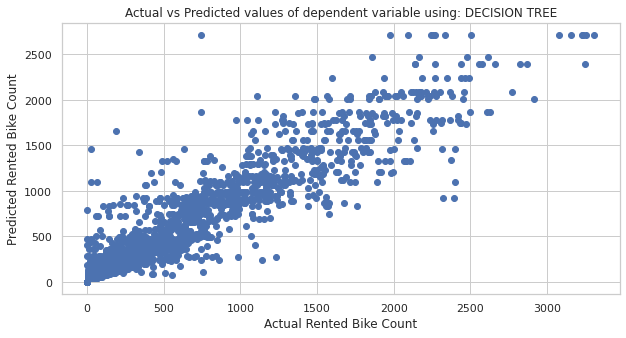

In [62]:
# Predicted vs actual values of dependent variable
plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=y_test_pred)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted values of dependent variable using: DECISION TREE')

**Feature Importance:-**

In [63]:
dt_model.feature_importances_

array([3.15252626e-01, 3.74481098e-01, 1.02984512e-01, 3.21008560e-05,
       1.70650442e-03, 6.76018429e-02, 1.85760201e-02, 4.78642459e-05,
       1.87474070e-03, 1.05961818e-02, 8.66282245e-02, 0.00000000e+00,
       1.62017118e-02, 3.43290664e-03, 5.83665967e-04, 0.00000000e+00])

In [64]:
# feature importance
feature_names = X_train.columns
feature_imp = pd.DataFrame({'cols':feature_names, 'imp':dt_model.feature_importances_}).sort_values('imp', ascending=False).reset_index()
feature_imp

,index,cols,imp
0,1,temperature,0.374481
1,0,Hour,0.315253
2,2,humidity,0.102985
3,10,fun_day,0.086628
4,5,solar_radiation,0.067602
5,6,rainfall,0.018576
6,12,Season_Autumn,0.016202
7,9,day_of_week,0.010596
8,13,Season_Spring,0.003433
9,8,month,0.001875


Text(0.5, 0, 'Relative Importance')

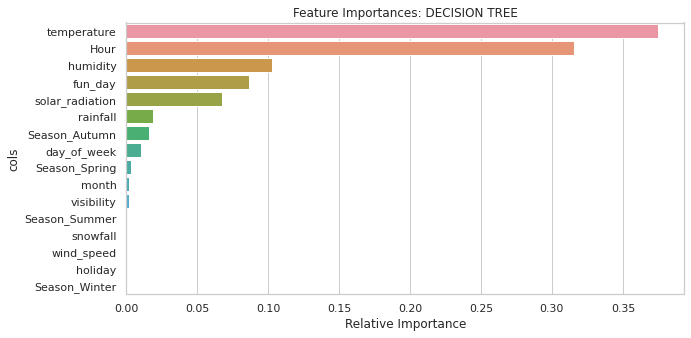

In [65]:
# visualising Feature importances
plt.figure(figsize=(10,5))
sns.barplot(data = feature_imp, y = 'cols', x = 'imp')
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')

* **Top 5 important features:-**

 * temperature
 * Hour
 * humidity
 * fun_day
 * solar_radiation 

### **2.** **Random Forest**

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
# random forest model
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[500],                   # Number of trees in random forest 
             'min_samples_leaf':np.arange(20,35)}

# n_estimators, larger is always better. Averaging more trees will yield a more robust ensemble by reducing overfitting.


In [68]:
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=5,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train)
rf_best_param = rf_gridsearch.best_params_

In [69]:
print("Best Parameters:", rf_best_param)

Best Parameters: {'min_samples_leaf': 20, 'n_estimators': 500}


In [70]:
# fitting rf model
rf_model = RandomForestRegressor(n_estimators=rf_best_param['n_estimators'],
                                 min_samples_leaf=rf_best_param['min_samples_leaf'],
                                 random_state=0)

In [71]:
# train model
rf_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=20, n_estimators=500, random_state=0)

In [72]:
# train score
print("trian score:",rf_model.score(X_train,y_train))
print("--"*20)

#test score
print("test score:",rf_model.score(X_test,y_test))

trian score: 0.8884561534385927
----------------------------------------
test score: 0.8563540395467903


In [73]:
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

**Evaluation Metrics**

**1. Mean absolute Error(MAE)**

In [74]:
rf_train_MAE = mean_absolute_error(y_train, rf_train_pred)
rf_train_MAE

138.47699424532254

In [75]:
rf_test_MAE = mean_absolute_error(y_test, rf_test_pred)
rf_test_MAE

157.62253922081365

**2.** **R Square/Adjusted R Square**

In [76]:
rf_r2_train =r2_score(y_train, rf_train_pred)
print("r2_train:", rf_r2_train )

print("--"*20)

print("Adjusted R2 for train : ",1-(1-rf_r2_train)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))



r2_train: 0.8884561534385927
----------------------------------------
Adjusted R2 for train :  0.8874275070149718


In [77]:
rf_r2_test = r2_score(y_test, rf_test_pred)
print("r2_test:", rf_r2_test )

print('--'*20)

print("Adjusted R2 for test : ",1-(1-rf_r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

r2_test: 0.8563540395467903
----------------------------------------
Adjusted R2 for test :  0.8550293505743112


* From the model, we can interpret that around $85.60$% of dependent variability can be explained by the model, and **adjusted R Square is roughly the same as R Square meaning the model is quite robust.**

**Predicted vs actual values of dependent variable**

Text(0.5, 1.0, 'Actual vs Predicted values of dependent variable using: RANDOM FOREST')

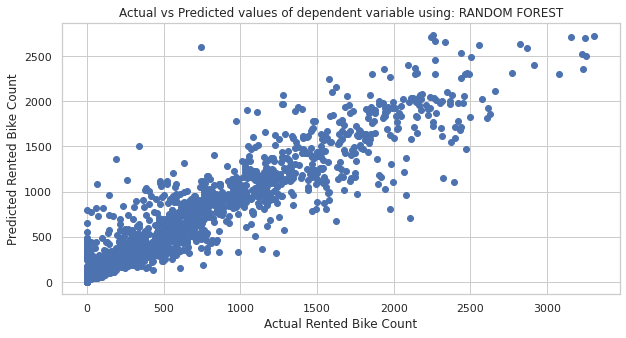

In [78]:
# Predicted vs actual values of dependent variable
plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=rf_test_pred)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted values of dependent variable using: RANDOM FOREST')

* Similarly to the decision tree, the random forest provides **feature importances**, which
are computed by aggregating the feature importances over the trees in the forest.

**Feature Importance:-**

In [79]:
rf_model.feature_importances_

array([3.07553483e-01, 3.59156436e-01, 7.87627621e-02, 1.91085681e-03,
       4.30019885e-03, 8.33209630e-02, 3.97442045e-02, 1.43201610e-04,
       3.88681166e-03, 1.07171889e-02, 7.86838914e-02, 0.00000000e+00,
       1.53472065e-02, 2.74627801e-03, 1.29613919e-03, 1.24303789e-02])

In [80]:
# feature importance
feature_names = X_train.columns
rf_feature_imp = pd.DataFrame({'cols':feature_names, 'imp':rf_model.feature_importances_}).sort_values('imp', ascending=False).reset_index()
rf_feature_imp

,index,cols,imp
0,1,temperature,0.359156
1,0,Hour,0.307553
2,5,solar_radiation,0.083321
3,2,humidity,0.078763
4,10,fun_day,0.078684
5,6,rainfall,0.039744
6,12,Season_Autumn,0.015347
7,15,Season_Winter,0.012430
8,9,day_of_week,0.010717
9,4,visibility,0.004300


Text(0.5, 0, 'Relative Importance')

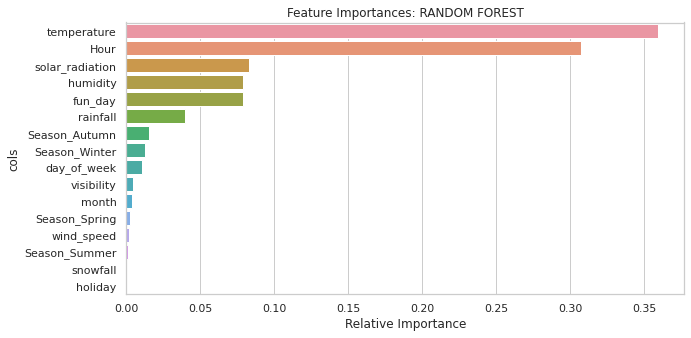

In [81]:
# visualising Feature importances
plt.figure(figsize=(10,5))
sns.barplot(data = rf_feature_imp, y = 'cols', x = 'imp')
plt.title('Feature Importances: RANDOM FOREST')
plt.xlabel('Relative Importance')

* **Top 6 important features:-**

 * temperature
 * Hour
 * solar_radiation 
 * humidity
 * fun_day
 * rainfall 